# Workflow
    Predicting prices is a common task in machine learning, with applications in various domains such as real estate, finance, and e-commerce. This documentation outlines a general workflow for finding the right model for predicting prices using machine learning techniques.

    1)Data Collection and Exploration:

        Collect a dataset that includes relevant features (predictors) and the corresponding price values.
        Explore the dataset to gain insights into the data distribution, feature types, missing values, and potential outliers.
         the data by handling missing values, outliers, and performing necessary data transformations (e.g., scaling, encoding categorical variables).

    2)Feature Selection and Engineering:

        Identify the most important features that are likely to have a significant impact on predicting prices.
        Perform feature selection techniques (e.g., correlation analysis, feature importance from models) to select the most relevant features.
        Consider feature engineering techniques to create new features based on domain knowledge or data understanding, such as interaction terms, polynomial features, or binning.

    3)Model Selection:

        Select an appropriate machine learning algorithm for predicting prices. Common choices include linear regression, decision trees, random forests, gradient boosting, and support vector machines.
        Consider the specific requirements of the problem, such as interpretability, model complexity, handling non-linearity, and scalability, to guide the selection of the model.
        Start with a baseline model and gradually explore more complex models to find the optimal balance between model performance and complexity.

    4)Model Training and Evaluation:

        Split the dataset into training and testing sets. Use the training set for model training and the testing set for evaluation.
        Train the selected model on the training set using appropriate techniques, such as cross-validation, regularization, or hyperparameter tuning.
        Evaluate the model's performance on the testing set using appropriate evaluation metrics, such as mean squared error (MSE), mean absolute error (MAE), or R-squared.
        Compare the performance of different models and consider additional evaluation techniques like k-fold cross-validation to assess the models' stability and generalization ability.

    5)Model Optimization and Fine-tuning:

        Based on the evaluation results, identify the strengths and weaknesses of the models.
        Optimize the model by fine-tuning hyperparameters using techniques like grid search, random search, or Bayesian optimization.
        Consider ensemble methods, such as model averaging or stacking, to combine multiple models and improve predictive performance.

    6)Model Deployment and Monitoring:

        Once a satisfactory model is found, retrain it on the entire dataset (including training and testing sets) to maximize its predictive power.
        Deploy the model into a production environment and monitor its performance over time.
        Regularly update and retrain the model as new data becomes available or when the model's performance degrades.

    7)Model Interpretability:
        The process of finding the right model for predicting prices involves data collection, exploration, feature selection, model selection, training, evaluation, optimization, and deployment. It is an iterative process that requires careful consideration of various factors, including data quality, feature importance, model complexity, and evaluation metrics. By following this workflow, one can identify an effective model that provides accurate price predictions in machine learning applications.

In [74]:
#instaling the dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from collections import OrderedDict
from sklearn.preprocessing import LabelEncoder


# Data collection and exploration

In [75]:
df = pd.read_csv('Model_data.csv')

df = df.drop(columns=['Unnamed: 0','State_ab'],axis= 1)  # dropping the irreleavnt columns
df.head()

,status,bed,bath,acre_lot,city,state,ALand,AWater,house_size,Type,Mean,Median,Stdev,sum_w,prone_to_natural_disasters,prev_sold_date,OldsellingPrice,CSUSHPISA,percentage_change,new_selling_price
0,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,2859549.0,36810.0,1192.0,Track,58507.0,48258.0,47247.0,1091.221424,0,2019-06,110000.0,208.701,0.428675,157154.3
1,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,5745207.0,0.0,1192.0,Track,81277.0,77849.0,52697.0,406.038436,0,2019-06,110000.0,208.701,0.428675,157154.3
2,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,2859549.0,36810.0,1192.0,Track,58507.0,48258.0,47247.0,1091.221424,0,2019-06,110000.0,208.701,0.428675,157154.3
3,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,1678138.0,229666.0,1192.0,Track,16468.0,17561.0,10634.0,37.330667,0,2019-06,110000.0,208.701,0.428675,157154.3
4,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,1258340.0,0.0,1192.0,Track,46149.0,38639.0,39421.0,355.739179,0,2019-06,110000.0,208.701,0.428675,157154.3


# presenting you the details of the features present

    ALand
    Type: Double
    Description: The Square area of land at the geographic or track location

    AWater
    Type: Double
    Description: The Square area of water at the geographic or track location.

    Mean
    Type: Double
    Description: The mean household income of the specified geographic location.

    Median
    Type: Double
    Description: The median household income of the specified geographic location.
    
    Stdev
    Type: Double
    Description: The standard deviation of the household income for the specified geographic 




In [76]:
# renaming the columns for better undrstanding

new_column_names = {'Mean':'Average(Area Income)',
                    'Median':'Median(Area Income)',
                    'Stdev':'StandardDeviation(Area Income)',
                    'sum_w':'Total_house_holds'}

df = df.rename(columns=new_column_names)

In [77]:
# checking for null values

df.isnull().sum()

status                               0
bed                                  0
bath                                 0
acre_lot                             0
city                                 0
state                                0
ALand                                0
AWater                               0
house_size                           0
Type                                 0
Average(Area Income)                 0
Median(Area Income)                  0
StandardDeviation(Area Income)       0
Total_house_holds                    0
prone_to_natural_disasters           0
prev_sold_date                       0
OldsellingPrice                      0
CSUSHPISA                         2777
percentage_change                 2777
new_selling_price                 2777
dtype: int64

In [78]:
df = df.dropna()


# checking the descrptive function of the dataframe and finding out any outliers

In [79]:
def custom_summary(df): 
    
    result = []
    
    for col in df.columns:
        
        if df[col].dtype != 'O':
        
            stats = OrderedDict ({
                'Feature_Name' : col,
                'Count':df[col].count(),
                'Minimum':df[col].min(),
                'Quarter 1':df[col].quantile(0.25), 
                "Mean":df[col].mean(),
                'Median':df[col].median(),
                'Quarter 3':df[col].quantile(0.75),
                'Maximum':df[col].max(),
                "Variance":df[col].var(),
                'Standard Deviation':df[col].std(),
                "Kurtosis":df[col].kurt(),
                'Skewness':df[col].skew() ,
                'IQR':df[col].quantile(0.75) - df[col].quantile(0.25)
            })
            
            result.append(stats)
        
        
    result_df = pd.DataFrame(result)
    
    skewtype =[]
    
    for i in result_df['Skewness']:
        if i<=-1:
            skewtype.append('Highly Negatively Skewed')
        elif i<= -0.5:
            skewtype.append('Moderately Negatively Skewed')
        elif -0.5 < i < 0 :
            skewtype.append('Approx Normal Distribution (-ve)')
        elif 0 <= i < 0.5:
            skewtype.append('Approx Normal Distribution (+ve)')
        elif 0.5<= i < 1:
            skewtype.append('Moderately Positively Skewed')
        elif i >= 1:
            skewtype.append('Highly Positively Skewed')
    
    result_df['Skew_Type'] = skewtype
    
    k_type = []
    
    for i in result_df['Kurtosis']:
        if i <=  -1:
            k_type.append('Highly Platykurtic Curve')
        elif -1 < i <= -0.5:#-.9 to .9
            k_type.append('Moderately Platykurtic Curve')
        elif -0.5 < i <= 0.5: #-1,-2,-3...
            k_type.append('Mesokurtic Curve')
        elif 0.5<= i < 1:
            k_type.append('Moderately Leptokurtic Curve')
        elif i >= 1:
            k_type.append('Highly Leptokurtic Curve')
            
        
    
    result_df['Kurtosis_Type'] = k_type
    
    
    #Outlier detection
    

    Upper_limit = stats['Quarter 3'] + 1.5*stats['IQR']
    
    lower_limit = stats['Quarter 1'] -1.5*stats['IQR']
    
    if len([x for x in df[col] if (x < lower_limit) or (x > Upper_limit)]) > 0:
        
        outlier_comment = 'has outliers'
        outlier_percentage = len([x for x in df[col] if (x < lower_limit) or (x > Upper_limit)])/len(df)
    else:
        oulier_comment = 'no outliers'
        
        outlier_percentage = 0
        
    result_df['outlier_comment'] = outlier_comment
    
    result_df['outlier_percentage'] = outlier_percentage
   
    return result_df

In [80]:
custom_summary(df)

,Feature_Name,Count,Minimum,Quarter 1,Mean,Median,Quarter 3,Maximum,Variance,Standard Deviation,Kurtosis,Skewness,IQR,Skew_Type,Kurtosis_Type,outlier_comment,outlier_percentage
0,bed,78861,1.000000,3.000000,3.647773e+00,3.000000e+00,4.000000e+00,3.300000e+01,2.627532e+00,1.620966e+00,21.489460,2.770198,1.000000e+00,Highly Positively Skewed,Highly Leptokurtic Curve,has outliers,0.087952
1,bath,78861,1.000000,2.000000,2.586056e+00,2.000000e+00,3.000000e+00,1.900000e+01,2.256521e+00,1.502172e+00,12.558027,2.569843,1.000000e+00,Highly Positively Skewed,Highly Leptokurtic Curve,has outliers,0.087952
2,acre_lot,78861,0.000000,0.130000,3.866490e+00,2.900000e-01,8.300000e-01,1.881700e+04,4.056359e+04,2.014040e+02,8686.433835,93.027083,7.000000e-01,Highly Positively Skewed,Highly Leptokurtic Curve,has outliers,0.087952
3,ALand,78861,0.000000,339676.000000,3.932772e+06,1.089768e+06,2.859549e+06,6.072946e+08,1.870254e+14,1.367572e+07,926.596492,23.681793,2.519873e+06,Highly Positively Skewed,Highly Leptokurtic Curve,has outliers,0.087952
4,AWater,78861,0.000000,0.000000,4.710732e+05,4.237000e+03,7.597200e+04,7.080607e+08,1.092033e+14,1.045004e+07,4266.212690,63.418593,7.597200e+04,Highly Positively Skewed,Highly Leptokurtic Curve,has outliers,0.087952
5,house_size,78861,170.000000,1320.000000,2.344875e+03,1.875000e+03,2.796000e+03,2.082100e+04,2.945828e+06,1.716341e+03,19.133424,3.412962,1.476000e+03,Highly Positively Skewed,Highly Leptokurtic Curve,has outliers,0.087952
6,Average(Area Income),78861,0.000000,52381.000000,7.643624e+04,7.484600e+04,9.458800e+04,1.831950e+05,1.073300e+09,3.276126e+04,0.023824,0.478284,4.220700e+04,Approx Normal Distribution (+ve),Mesokurtic Curve,has outliers,0.087952
7,Median(Area Income),78861,0.000000,36215.000000,8.959049e+04,6.225700e+04,8.920600e+04,3.000000e+05,7.547057e+09,8.687380e+04,1.598663,1.718897,5.299100e+04,Highly Positively Skewed,Highly Leptokurtic Curve,has outliers,0.087952
8,StandardDeviation(Area Income),78861,0.000000,45736.000000,5.858519e+04,5.814900e+04,7.204800e+04,1.038360e+05,3.809066e+08,1.951683e+04,-0.218454,-0.064043,2.631200e+04,Approx Normal Distribution (-ve),Mesokurtic Curve,has outliers,0.087952
9,Total_house_holds,78861,0.000000,190.391318,4.675198e+02,2.721342e+02,5.470712e+02,2.028124e+04,8.846134e+05,9.405389e+02,284.443400,15.001452,3.566799e+02,Highly Positively Skewed,Highly Leptokurtic Curve,has outliers,0.087952


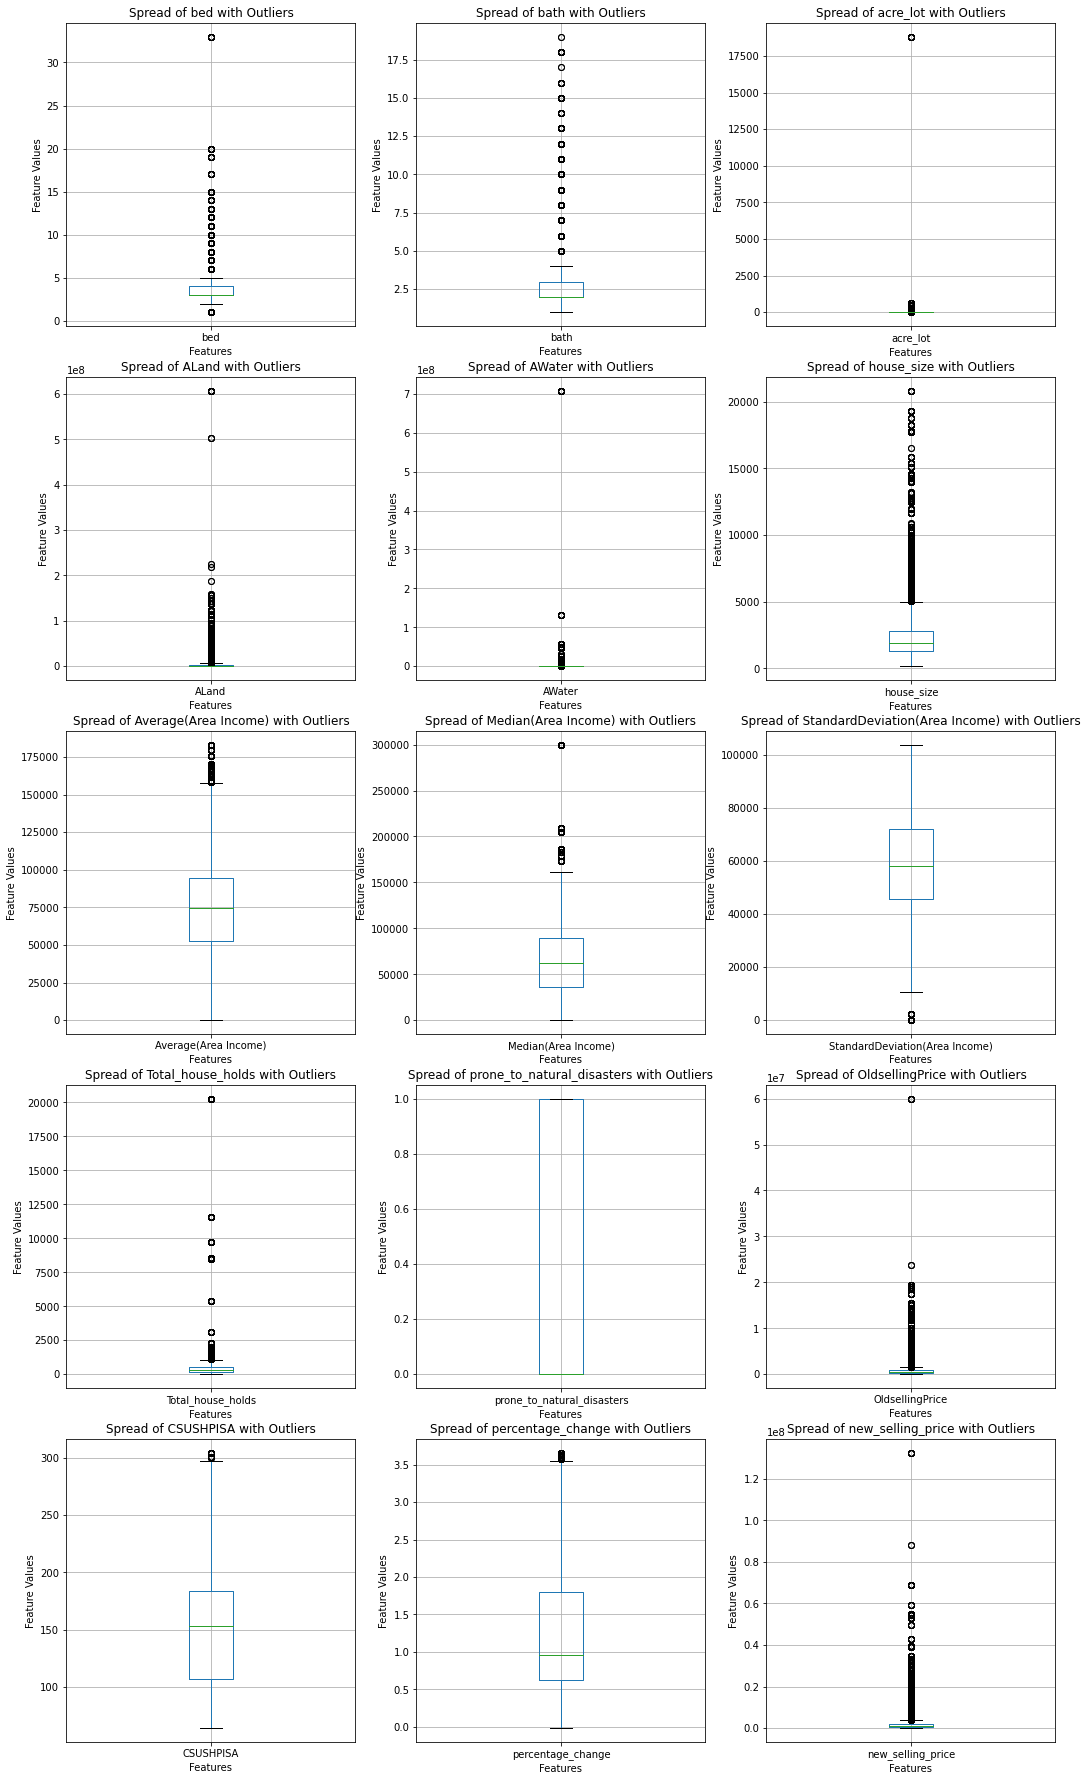

In [81]:
numeric_columns = [col for col in df.columns if df[col].dtype != 'O']
num_plots = len(numeric_columns)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_plots - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout(pad=3.0)

for i, column in enumerate(numeric_columns):
    ax = axes[i // num_cols, i % num_cols]
    df.boxplot(column=column, ax=ax)
    ax.set_title(f'Spread of {column} with Outliers')
    ax.set_ylabel('Feature Values')
    ax.set_xlabel('Features')

# Hide empty subplots if the number of plots is not a multiple of num_cols
for i in range(num_plots, num_rows*num_cols):
    fig.delaxes(axes[i // num_cols, i % num_cols])

plt.show()

# linear encoding the categorical variables
    1) Prior to that we will get rid of certain features that are not needed to be considered for our model evaluation

In [82]:
df.columns

Index(['status', 'bed', 'bath', 'acre_lot', 'city', 'state', 'ALand', 'AWater',
       'house_size', 'Type', 'Average(Area Income)', 'Median(Area Income)',
       'StandardDeviation(Area Income)', 'Total_house_holds',
       'prone_to_natural_disasters', 'prev_sold_date', 'OldsellingPrice',
       'CSUSHPISA', 'percentage_change', 'new_selling_price'],
      dtype='object')

In [83]:
df = df.drop(columns=['status','Total_house_holds','percentage_change','AWater','Median(Area Income)','StandardDeviation(Area Income)'],axis=1)

In [84]:
df.head()

,bed,bath,acre_lot,city,state,ALand,house_size,Type,Average(Area Income),prone_to_natural_disasters,prev_sold_date,OldsellingPrice,CSUSHPISA,new_selling_price
0,7.0,3.0,0.09,Dorado,Puerto Rico,2859549.0,1192.0,Track,58507.0,0,2019-06,110000.0,208.701,157154.3
1,7.0,3.0,0.09,Dorado,Puerto Rico,5745207.0,1192.0,Track,81277.0,0,2019-06,110000.0,208.701,157154.3
2,7.0,3.0,0.09,Dorado,Puerto Rico,2859549.0,1192.0,Track,58507.0,0,2019-06,110000.0,208.701,157154.3
3,7.0,3.0,0.09,Dorado,Puerto Rico,1678138.0,1192.0,Track,16468.0,0,2019-06,110000.0,208.701,157154.3
4,7.0,3.0,0.09,Dorado,Puerto Rico,1258340.0,1192.0,Track,46149.0,0,2019-06,110000.0,208.701,157154.3


In [85]:
# checking for duplicates

duplicate_rows = df.duplicated()
total_duplicates = duplicate_rows.sum()


print("Total number of duplicated rows:",total_duplicates)

Total number of duplicated rows: 8130


In [86]:
# dropping them

df = df.drop_duplicates()
df = df.reset_index(drop=True)

df.shape

(70731, 14)

In [87]:
df.head()

,bed,bath,acre_lot,city,state,ALand,house_size,Type,Average(Area Income),prone_to_natural_disasters,prev_sold_date,OldsellingPrice,CSUSHPISA,new_selling_price
0,7.0,3.0,0.09,Dorado,Puerto Rico,2859549.0,1192.0,Track,58507.0,0,2019-06,110000.0,208.701,157154.3
1,7.0,3.0,0.09,Dorado,Puerto Rico,5745207.0,1192.0,Track,81277.0,0,2019-06,110000.0,208.701,157154.3
2,7.0,3.0,0.09,Dorado,Puerto Rico,1678138.0,1192.0,Track,16468.0,0,2019-06,110000.0,208.701,157154.3
3,7.0,3.0,0.09,Dorado,Puerto Rico,1258340.0,1192.0,Track,46149.0,0,2019-06,110000.0,208.701,157154.3
4,5.0,4.0,0.99,Saint Thomas,Virgin Islands,72079712.0,5000.0,Track,81043.0,1,2013-10,950000.0,159.241,1778798.8


# as the new selling price has alrady been calculated so we wont be needing the 'CSUSHPISA' any more for training our model